# Explore here

In [2]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Leer el archivo CSV
df = pd.read_csv('../data/raw/rent-ny-airbnb.csv', sep=',') # Este archivo CSV contiene comas como separadores
print(df.head())
print(df.columns) 

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [3]:
print(f"Dimensiones del dataframe: {df.shape}")
print(df.info())

Dimensiones del dataframe: (48895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64 

In [12]:
print(f"Valores nulos por columna: {df.isnull().sum()}\n")
print(f"Valores unicos por columna: {df.nunique()}")

Valores nulos por columna: id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Valores unicos por columna: id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude  

### Eliminamos las columnas que no nos aportan datos relevantes

In [ ]:
print(df.drop("latitude", axis = 1).duplicated().sum())
print(df.drop("longitude", axis = 1).duplicated().sum())
print("Ya que no hay duplicados en latitud ni longitud, procedemos a eliminar las columnas innecesarias")

#dropeamos last reviews ya que tienen muchos nulos
total_dataf = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=False)
print(total_dataf.shape)
print(total_dataf.columns)
total_dataf.head()

0
0
Ya que no hay duplicados en latitud ni longitud, procedemos a eliminar las columnas innecesarias
(48895, 11)
Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Análisis de variables univariante

### Generamos gráficos con los valores categóricos

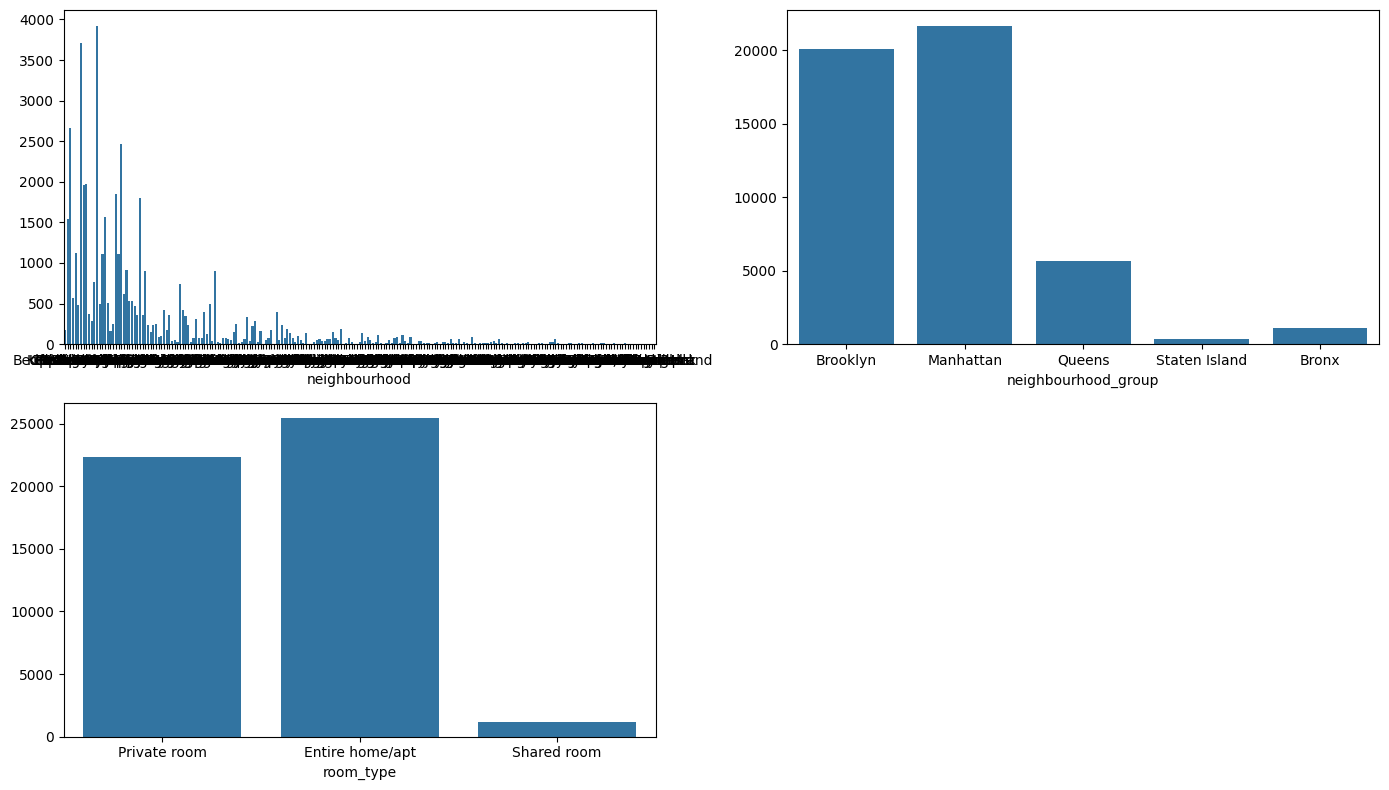

In [6]:
fig, axis = plt.subplots(2, 2, figsize = (14, 8))

# Crear un histograma múltiple
sns.countplot(ax = axis[0, 0], data = total_dataf, x = "neighbourhood").set(ylabel = None)
sns.countplot(ax = axis[0, 1], data = total_dataf, x = "neighbourhood_group").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_dataf, x = "room_type").set(ylabel = None)

fig.delaxes(axis[1, 1])
# Ajustar el layout
plt.tight_layout()
plt.show()


# Mostrar el plot
plt.show()

### Generamos gráficos con los valores numéricos con posibles outlayers

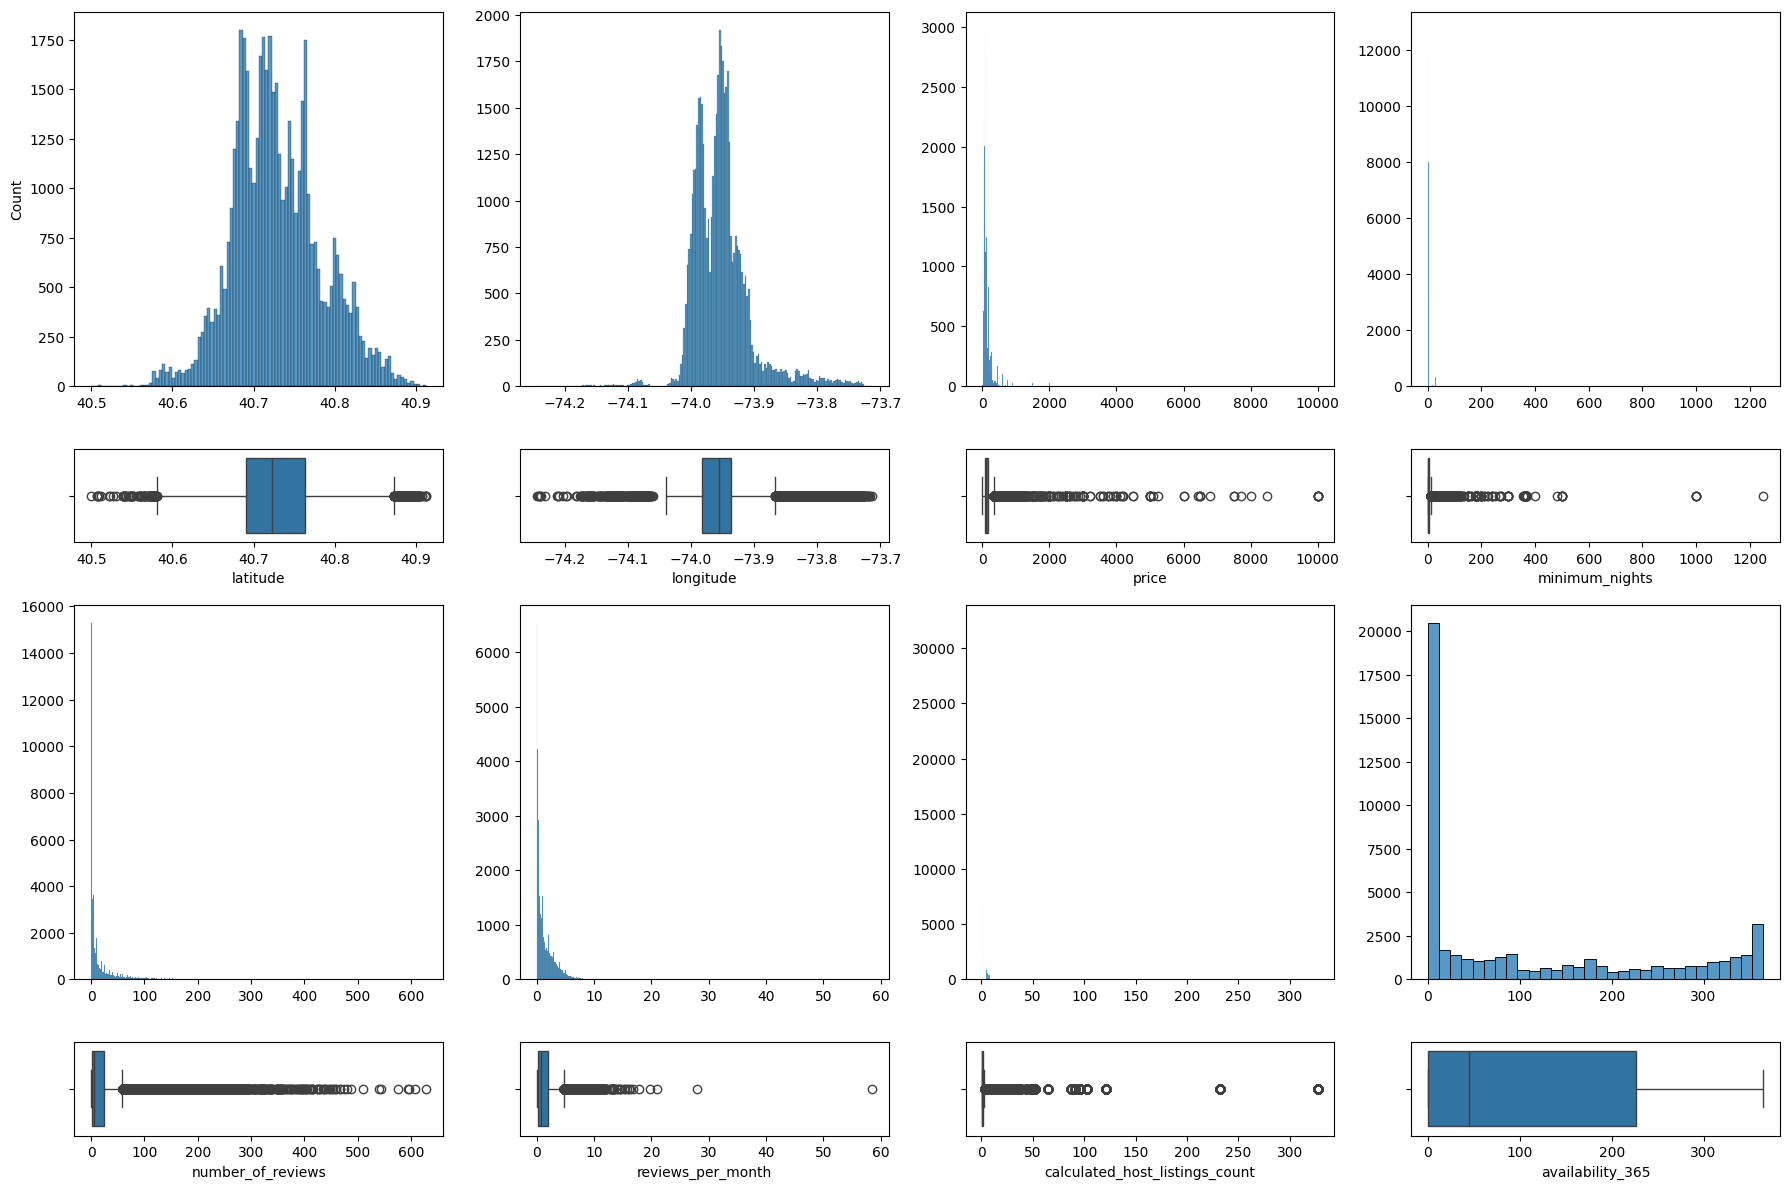

In [ ]:
fig, axis = plt.subplots(4, 4, figsize = (18, 12), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_dataf, x = "latitude").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_dataf, x = "latitude")

sns.histplot(ax = axis[0, 1], data = total_dataf, x = "longitude").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_dataf, x = "longitude")

sns.histplot(ax = axis[0, 2], data = total_dataf, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_dataf, x = "price")

sns.histplot(ax = axis[0, 3], data = total_dataf, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_dataf, x = "minimum_nights")



sns.histplot(ax = axis[2, 0], data = total_dataf, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_dataf, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = total_dataf, x = "reviews_per_month").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_dataf, x = "reviews_per_month")

sns.histplot(ax = axis[2, 2], data = total_dataf, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_dataf, x = "calculated_host_listings_count")

sns.histplot(ax = axis[2, 3], data = total_dataf, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 3], data = total_dataf, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

## Análisis de variables multivariante

### Análisis numérico-numérico

Tomaremos el "price" como variable objetivo

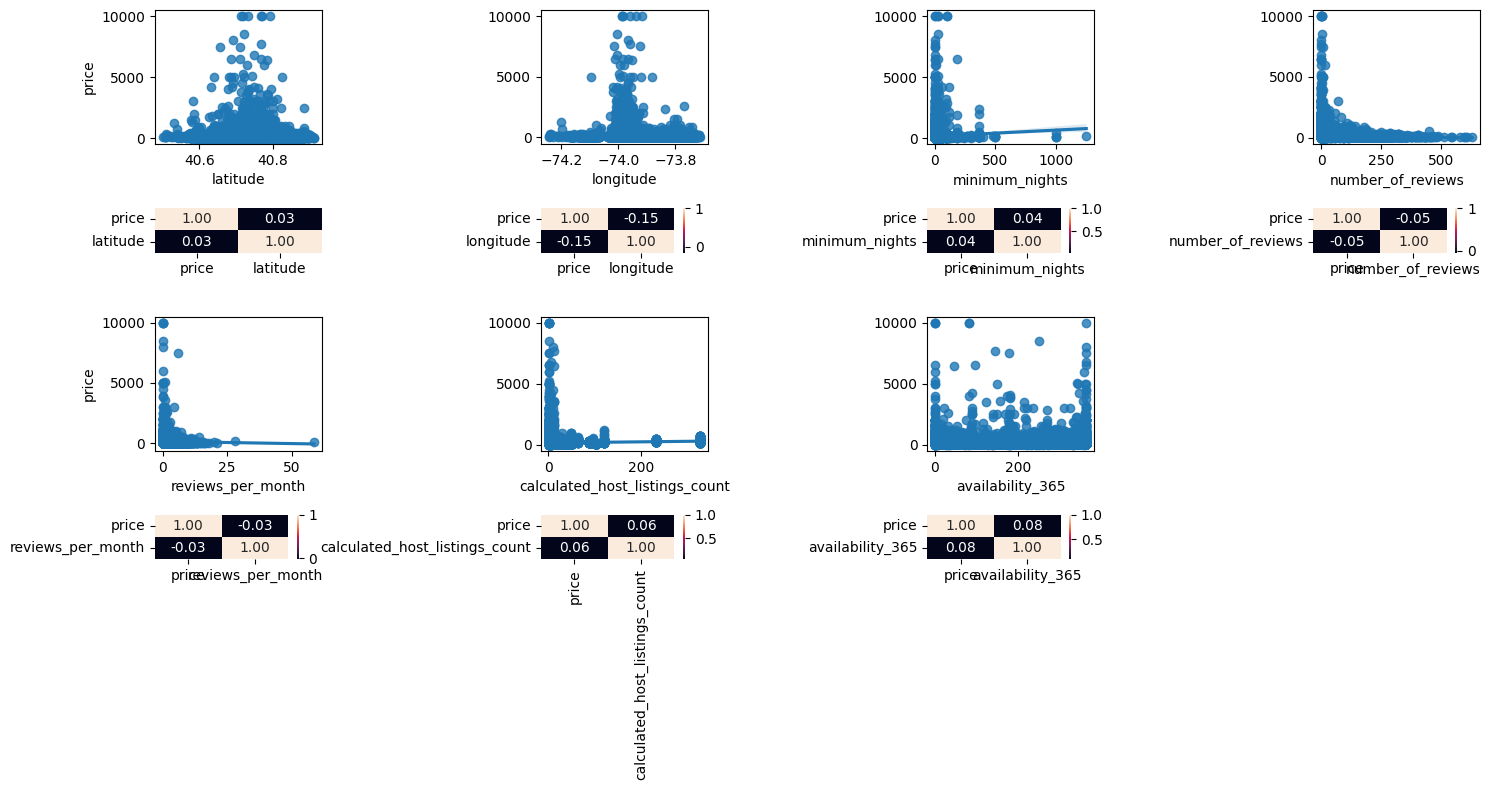

In [29]:
fig, axis = plt.subplots(4, 4, figsize = (15, 8), gridspec_kw={'height_ratios': [3, 1, 3, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "latitude", y = "price")
sns.heatmap(total_dataf[["price", "latitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

sns.regplot(ax = axis[0, 3], data = total_dataf, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3])



sns.regplot(ax = axis[2, 0], data = total_dataf, x = "reviews_per_month", y = "price")
sns.heatmap(total_dataf[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = total_dataf, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[2, 2], data = total_dataf, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(total_dataf[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 2])

fig.delaxes(axis[2, 3])
fig.delaxes(axis[3, 3])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Se puede apreciar que no existe una relación directa entre el precio (price) y las distintas variables numéricas. Aunque algunos sí estan relacionados como podría ser el caso de "latitude", "minimum_nights", "calculated_listings_host_count" y "availability_365" que tienen una ligera influencia a la hora de aumentar el precio siendo "availability_365" el que mas influencia tiene comparado con el resto.

Por otro lado, existe una relación negativa lineal con "longitud", "number_of_reviews" y "reviews_per_month" frente a la variable objetivo contrario a lo que normalmente se pensaría.

En resumen, aunque algunas varibles numéricas influyen en la variable objetivo, ninguna representa un facto decisivo a la hora de variar el precio de un alojamiento de AirBnB en Nueva York.

#### availability_365-reviews_per_month | calculated_host_listings_count-number_of_reviews | minimum_nights-number_of_reviews

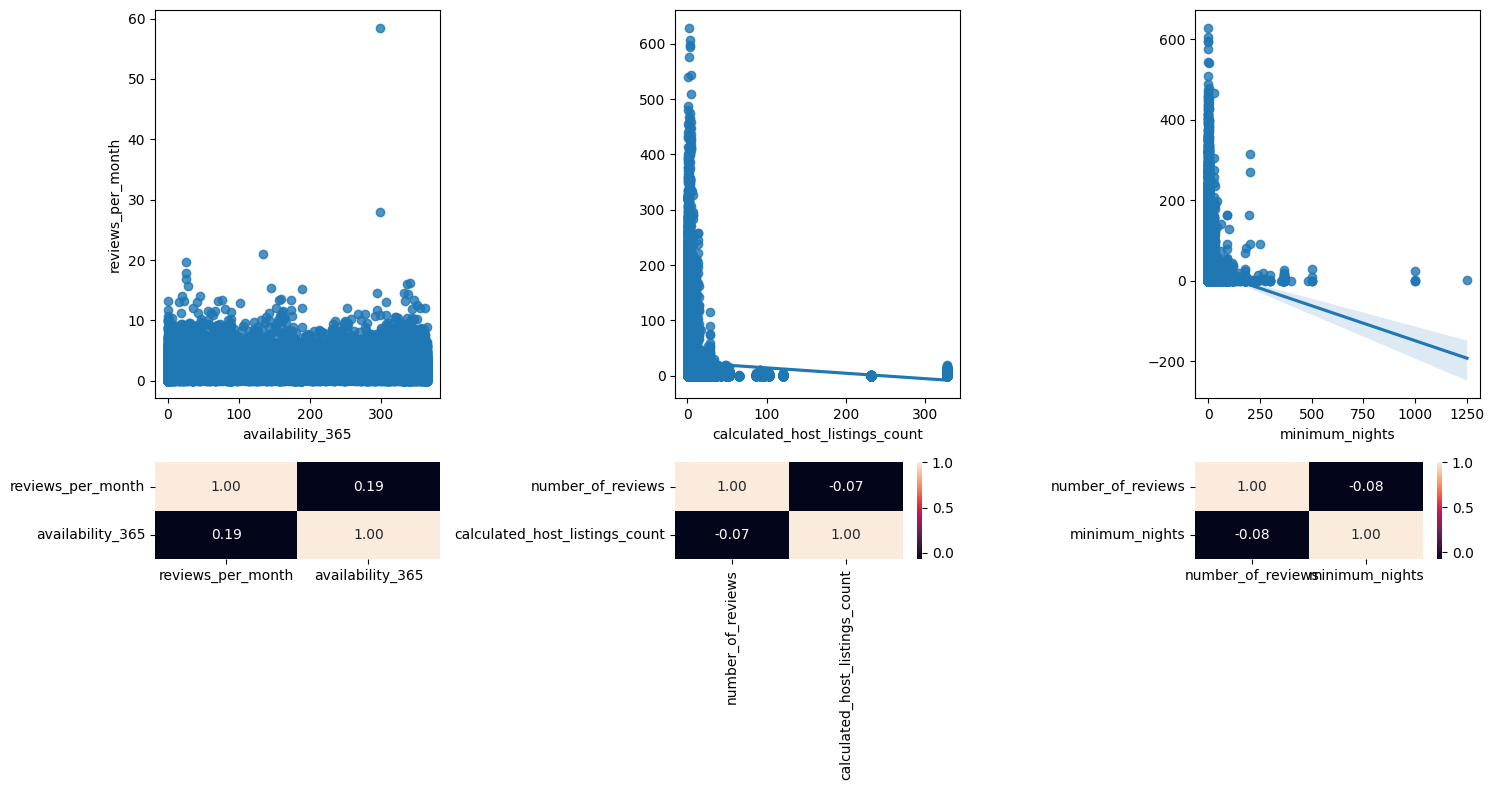

In [28]:
fig, axis = plt.subplots(2, 3, figsize = (15, 8), gridspec_kw={'height_ratios': [4, 1]})

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_dataf, x = "availability_365", y = "reviews_per_month")
sns.heatmap(total_dataf[["reviews_per_month", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_dataf, x = "calculated_host_listings_count", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(total_dataf[["number_of_reviews", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_dataf, x = "minimum_nights", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(total_dataf[["number_of_reviews", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Combinaciones post-mapa de calor

### Análisis categórico-categórico


In [9]:
days_since_last_review = (total_dataf['last_review'].max() - total_dataf['last_review']).dt.days

df['host_type'] = df['calculated_host_listings_count'].apply(
    lambda x: 'single_host' if x == 1 else 'multi_host'
)

KeyError: 'last_review'